In [1]:
# Modules will be reloaded every time a cell is executed
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from os import listdir
from os.path import isfile, join

from funmirtar.models.seeds import SEED_TYPE_TO_EXTRACTION_FUNCTION
from funmirtar.models.constants import CLASSIFICATION_COLUMNS
from funmirtar.utils.plots import plot_prc_with_seeds
from funmirtar.utils.file import make_dir_with_parents

In [15]:
# pd.read_pickle('../data/predictions/seed_counts/seed_counts.class_preds.test.pkl')

In [3]:
COMPARISON_NAME = "random_forest-seeds.signal.local_features.target_scan"
# COMPARISON_NAME = "model_comparison-seeds.signal.local_features.target_scan"

In [4]:
OUT_FOLDER_PATH = f"../plots/{COMPARISON_NAME}/"

In [5]:
PREDICTIONS_DIR_PATH = '../data/predictions/'
DIR_PATHS = [
    f"{PREDICTIONS_DIR_PATH}seeds.signal.local_features.model_optimisation/",
    f"{PREDICTIONS_DIR_PATH}seeds.signal.local_features/",
    f"{PREDICTIONS_DIR_PATH}seeds.signal/",
    f"{PREDICTIONS_DIR_PATH}seeds/",
    f"{PREDICTIONS_DIR_PATH}seed_counts/",
    f"{PREDICTIONS_DIR_PATH}target_scan/",
]

In [6]:
METHODS_TO_PLOT=[
    'weighted context++ score percentile (filled NaNs)',
    'random_forest.seeds',
    'random_forest.seeds.signal',
    'random_forest.seeds.signal.local_features',
    # 'random_forest.default.seeds.signal.local_features.model_optimisation',
    # 'random_forest.optimised.seeds.signal.local_features.model_optimisation',
    # 'gradient_boosting_classifier.seeds', 
    # 'gradient_boosting_classifier.seeds.signal', 
    # 'gradient_boosting_classifier.seeds.signal.local_features',
    # 'logistic_regression.seeds',
    # 'logistic_regression.seeds.signal',
    # 'logistic_regression.seeds.signal.local_features',
    # 'svm.seeds.signal',
    # 'xgb.seeds.signal',
]

In [7]:
paths_train = []
paths_test = []

for path in DIR_PATHS:
    files = [f for f in listdir(path) if isfile(join(path, f))]
    train_files = [file for file in files if 'train.pkl' in file]
    test_files = [file for file in files if 'test.pkl' in file]
    if train_files:
        paths_train.append(path + train_files[0])
    if test_files:
         paths_test.append(path + test_files[0])
            
paths_train, paths_test

(['../data/predictions/seeds.signal.local_features.model_optimisation/3utr.sequences.refseq_id.mirna_fc.seed_cls.sequence.signal.conservation.seed_cls.ts_preds.local_features.class_preds.train.pkl',
  '../data/predictions/seeds.signal.local_features/3utr.sequences.refseq_id.mirna_fc.seed_cls.sequence.signal.conservation.seed_cls.ts_preds.local_features.class_preds.train.pkl',
  '../data/predictions/seeds.signal/3utr.sequences.refseq_id.mirna_fc.seed_cls.sequence.signal.conservation.seed_cls.ts_preds.local_features.class_preds.train.pkl',
  '../data/predictions/seeds/3utr.sequences.refseq_id.mirna_fc.seed_cls.sequence.signal.conservation.seed_cls.ts_preds.local_features.class_preds.train.pkl',
  '../data/predictions/seed_counts/seed_counts.class_preds.train.pkl',
  '../data/predictions/target_scan/target_scan.conserved_nonconserved.class_preds.train.pkl'],
 ['../data/predictions/seeds.signal.local_features.model_optimisation/3utr.sequences.refseq_id.mirna_fc.seed_cls.sequence.signal.con

In [8]:
def merge_dataframes(dataframes, merge_on_columns):
    return reduce(
        lambda x, y: pd.merge(x, y, on = merge_on_columns), dataframes
    )

def load_and_merge_pickle_dataframes(pickle_paths, merge_on_columns):
    dataframes = []
    for path in pickle_paths:
        df = pd.read_pickle(path)
        dataframes.append(df)
    merged_df = merge_dataframes(dataframes, merge_on_columns)
    return merged_df

In [9]:
data_train = load_and_merge_pickle_dataframes(paths_train, CLASSIFICATION_COLUMNS)
data_test = load_and_merge_pickle_dataframes(paths_test, CLASSIFICATION_COLUMNS)

In [10]:
make_dir_with_parents(OUT_FOLDER_PATH)

PosixPath('../plots/random_forest-seeds.signal.local_features.target_scan')

/home/jovyan/functional_mirna_targeting/miRNA/src/funmirtar/utils/plots.py:273: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


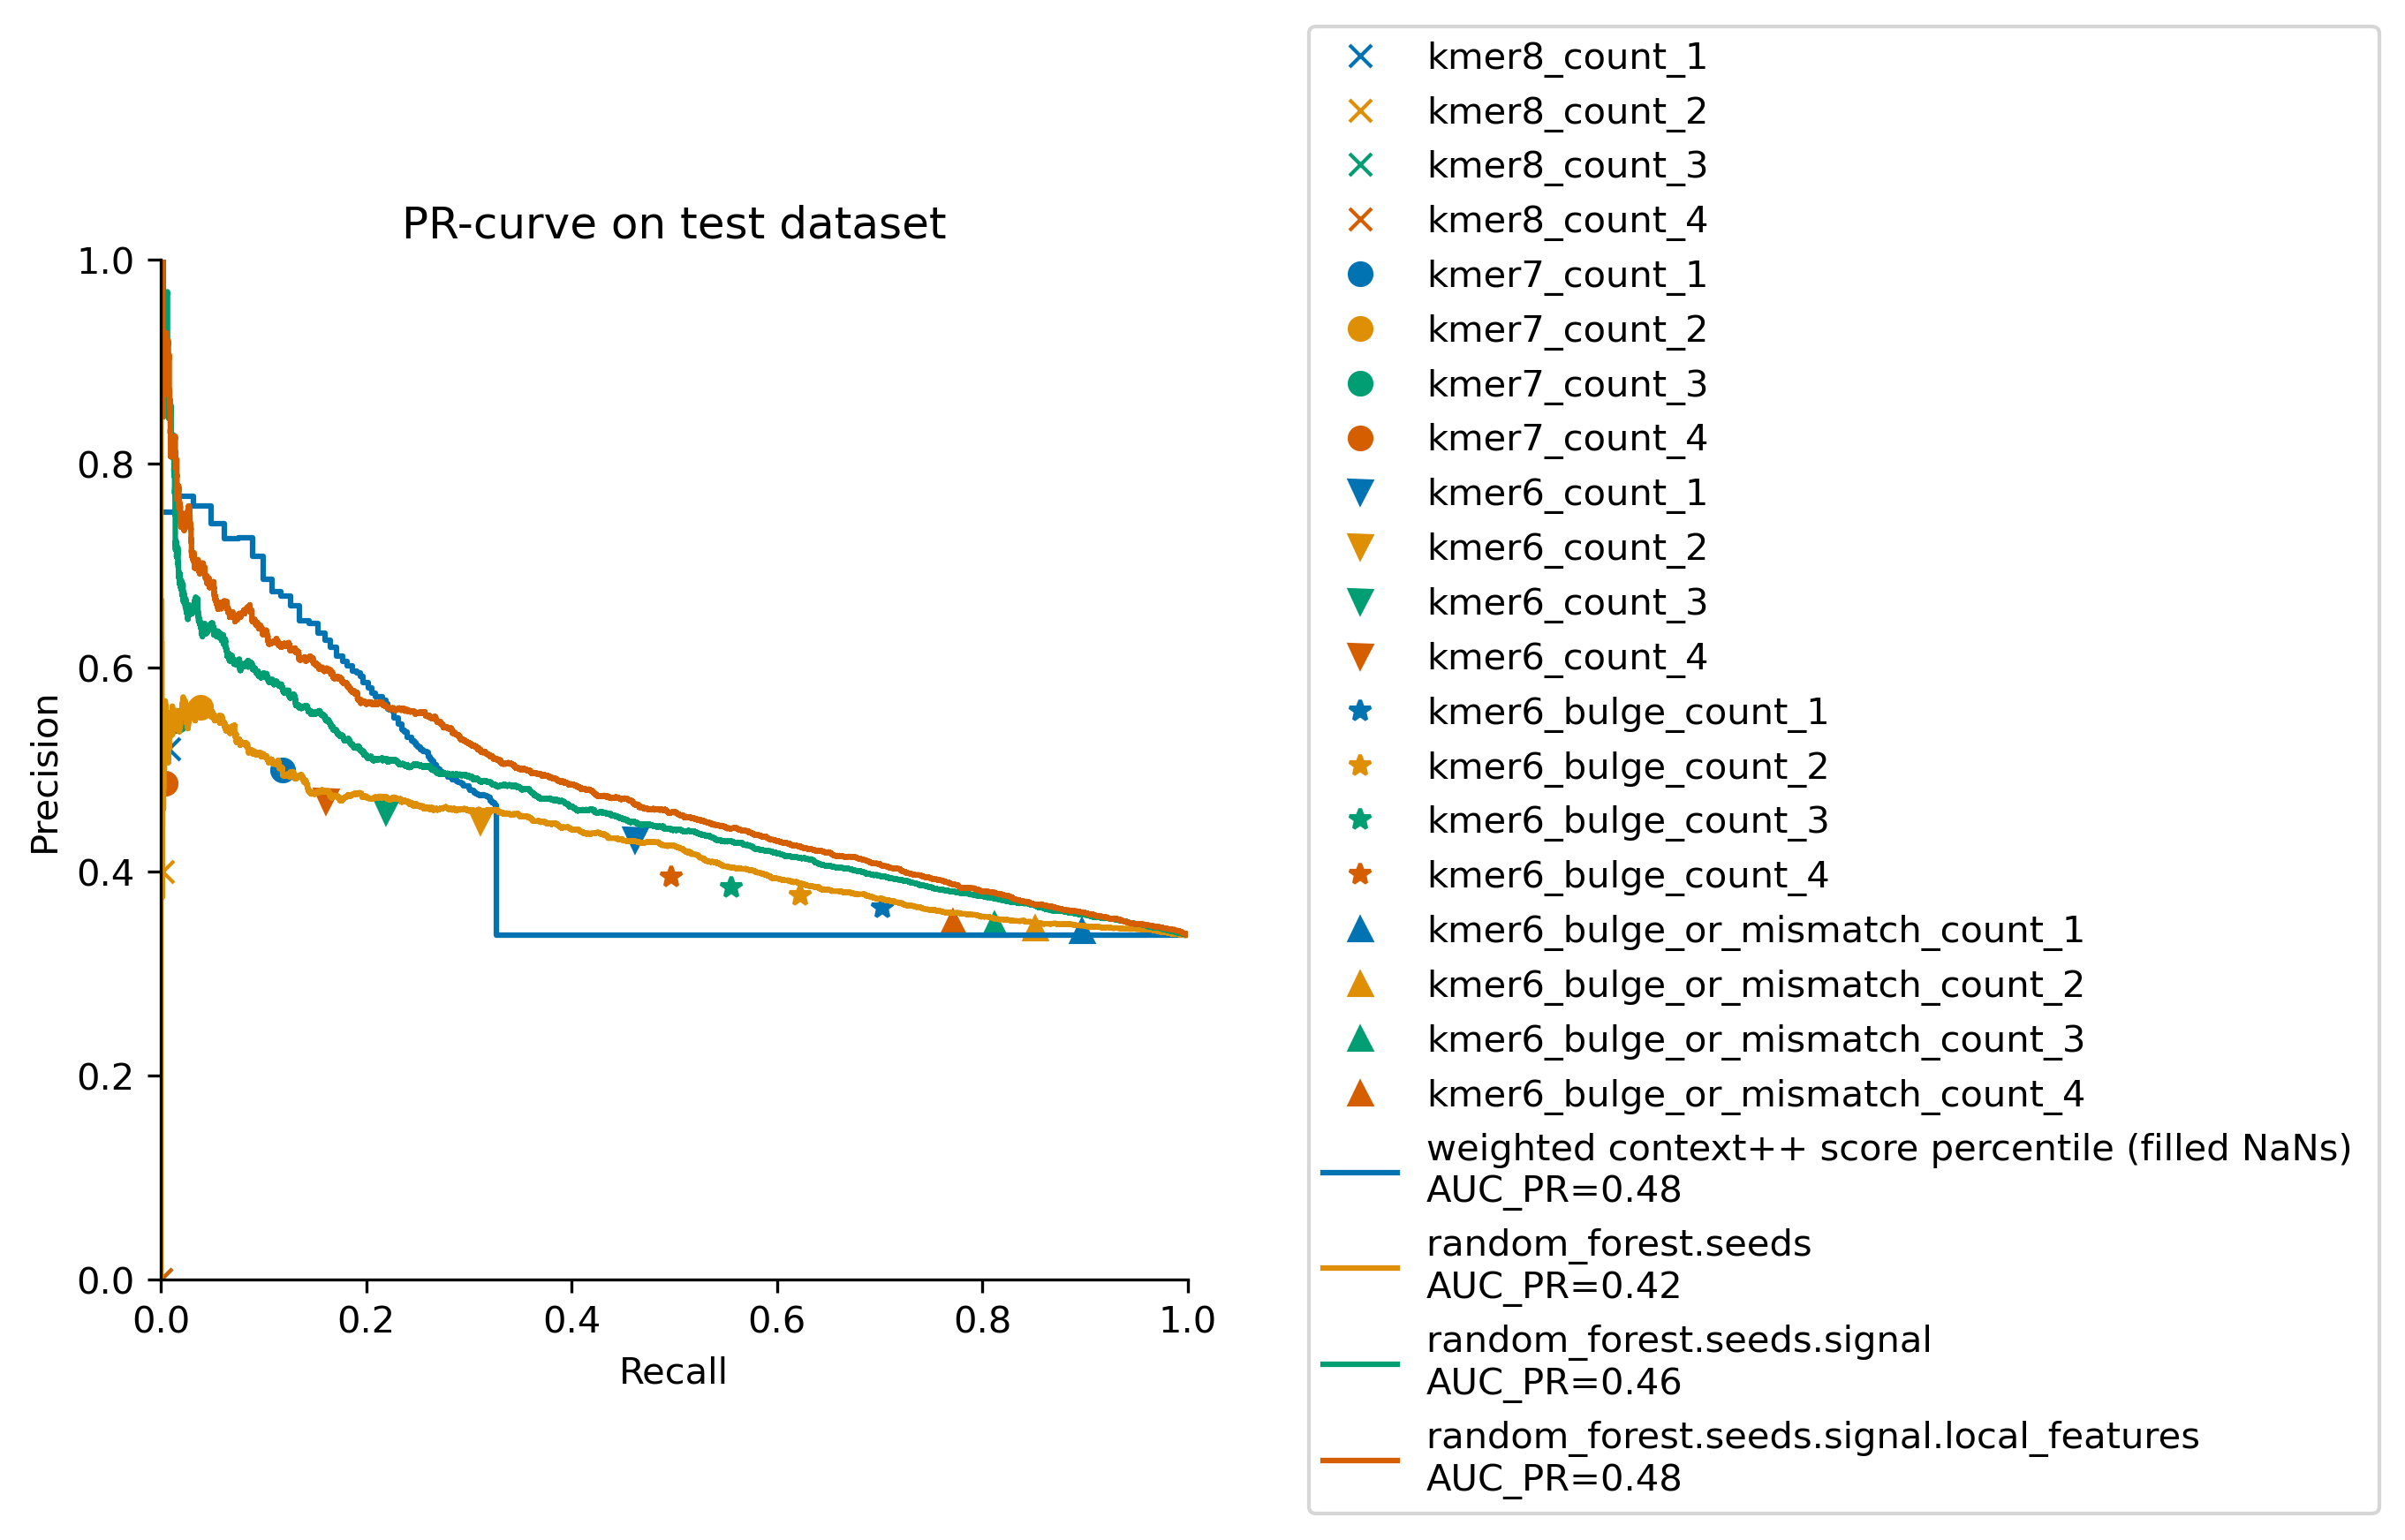

In [11]:
_, ax = plot_prc_with_seeds(
    data_test, 
    SEED_TYPE_TO_EXTRACTION_FUNCTION,
    METHODS_TO_PLOT,
    title='PR-curve on test dataset',
    path=OUT_FOLDER_PATH + '/test'
)

/home/jovyan/functional_mirna_targeting/miRNA/src/funmirtar/utils/plots.py:273: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


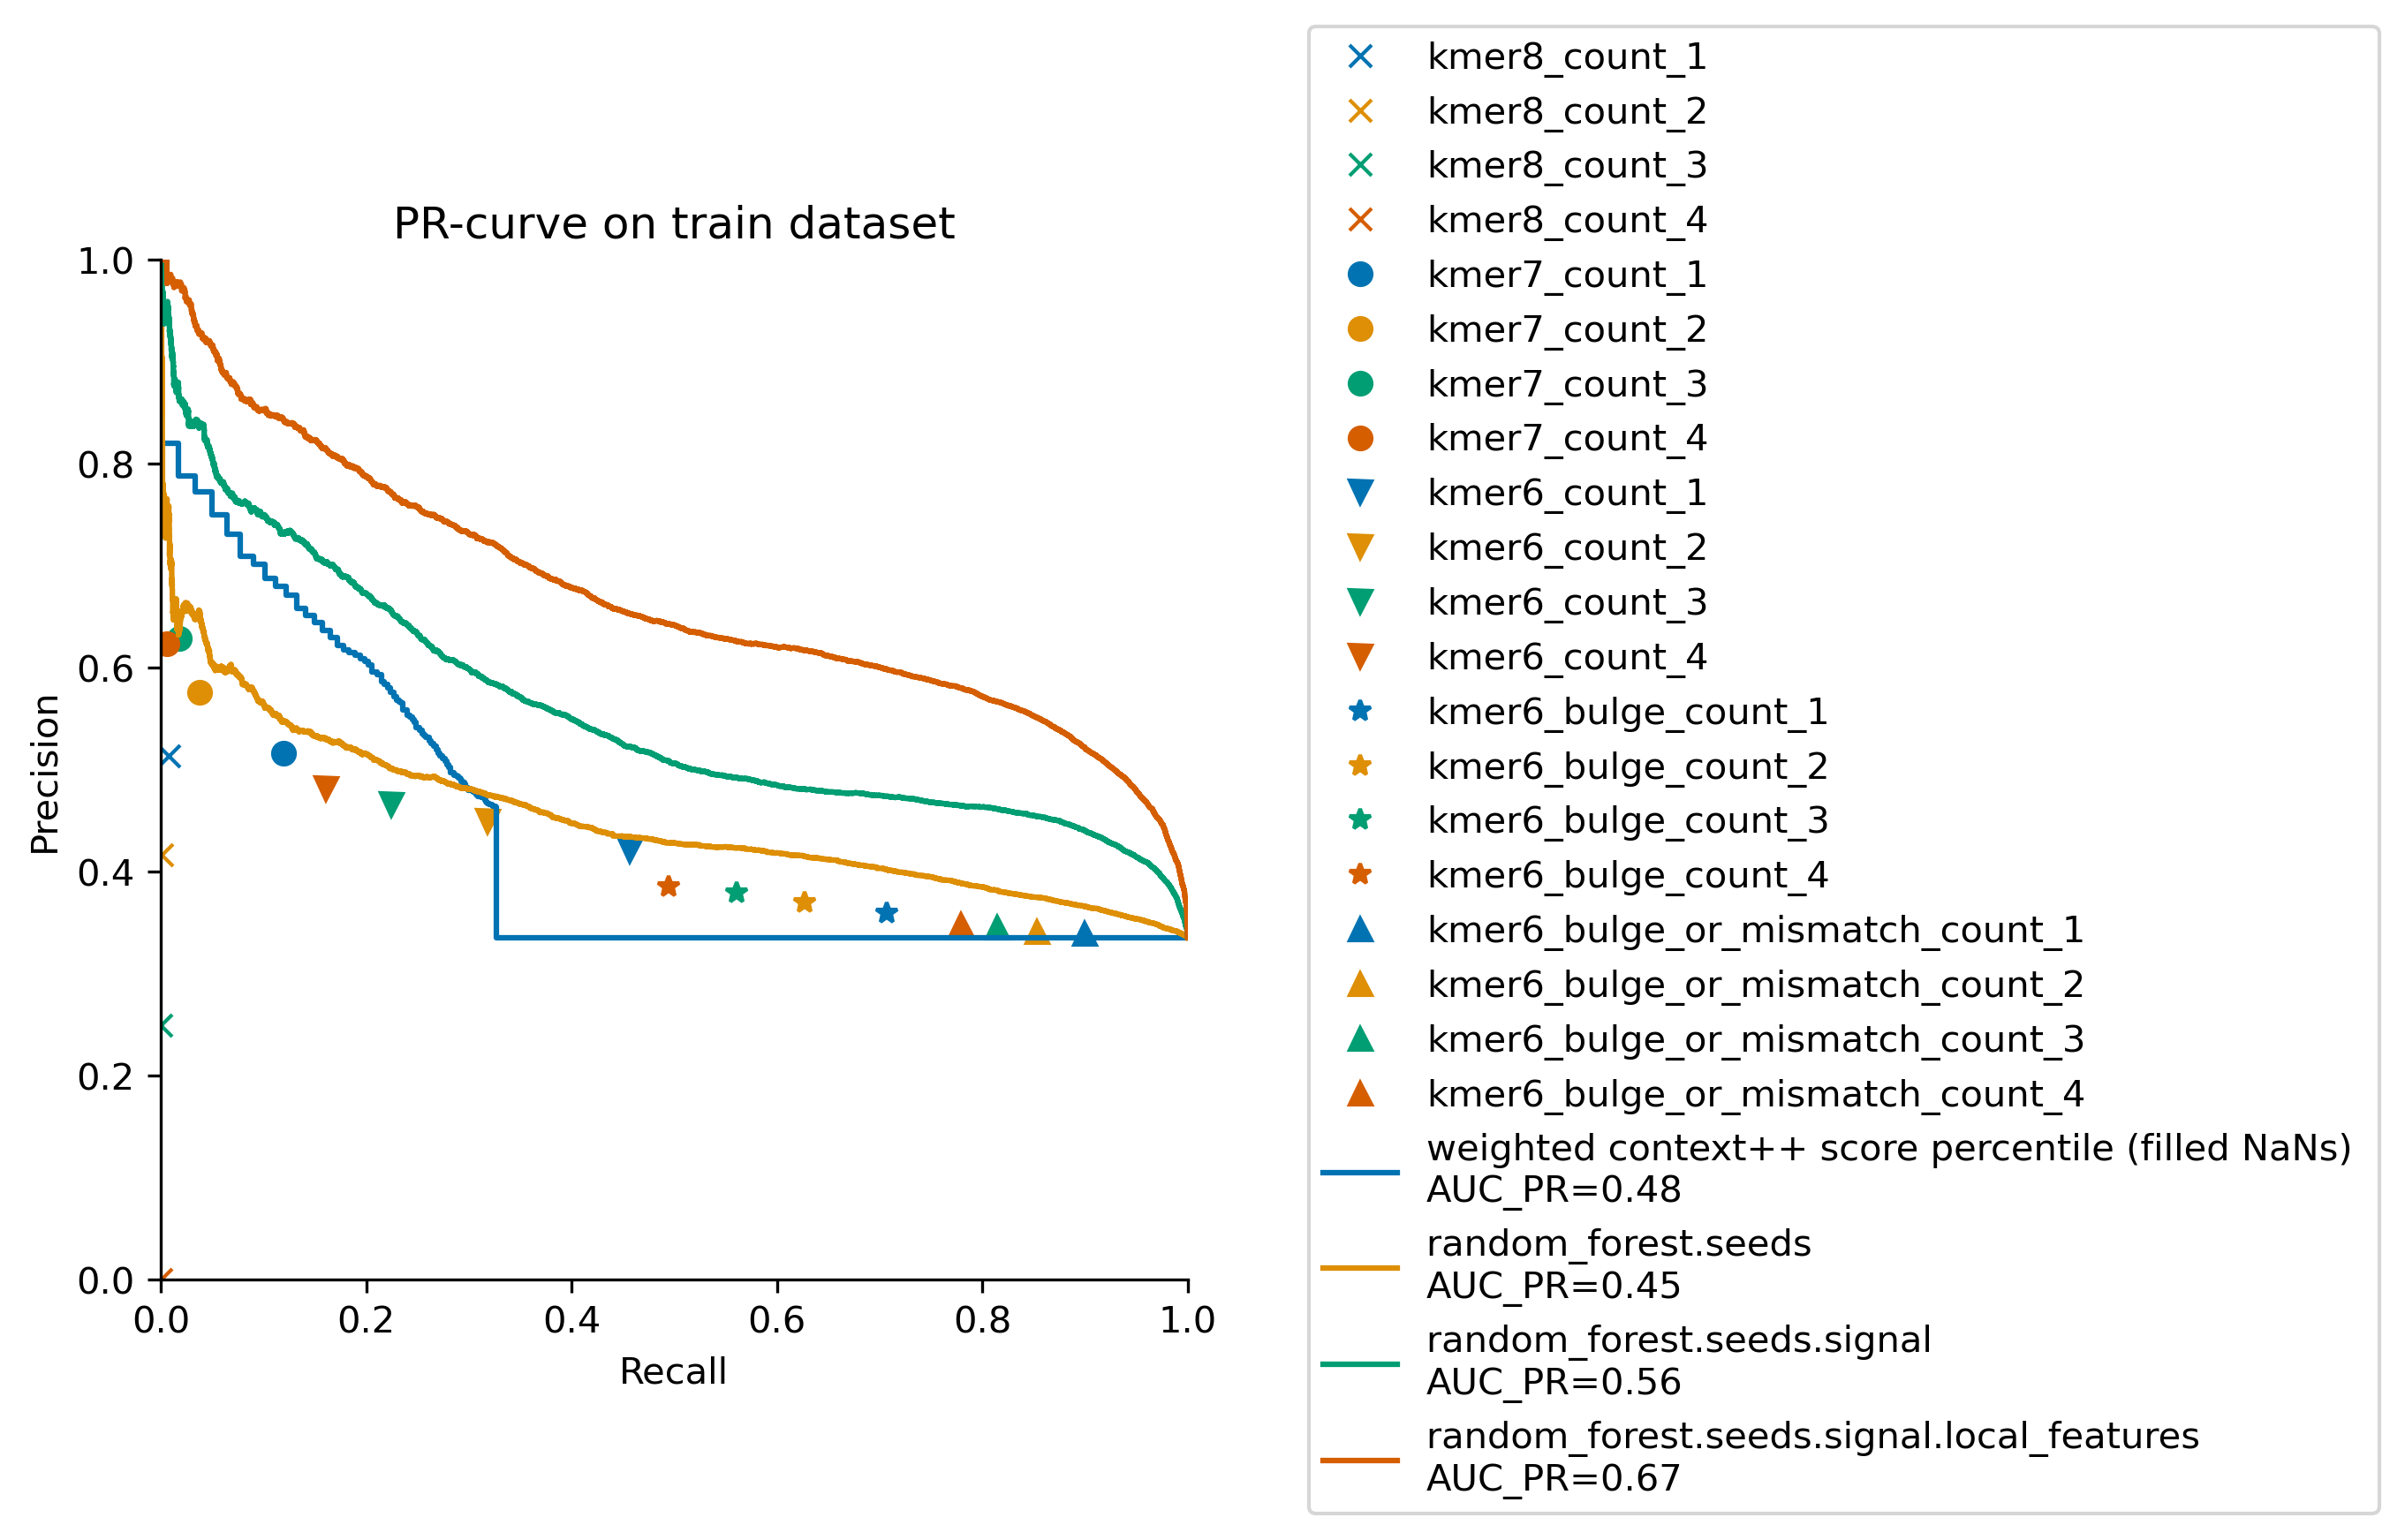

In [12]:
_, ax = plot_prc_with_seeds(
    data_train, 
    SEED_TYPE_TO_EXTRACTION_FUNCTION, 
    METHODS_TO_PLOT,
    title='PR-curve on train dataset',
    path=OUT_FOLDER_PATH + '/train'
)